#### Numpy and Mathplotlib are useful Libraries provided by Python 

In [3]:
import numpy as np
import matplotlib.pyplot as plt  

#### Task-1-Part-1

In [4]:
## Explain Transitions Matrix
#numpy array allows to create the 
#let's assume A variable to store the transitions Matrix 
A = np.array([[0.05, 0.1, 0.0, 0.5],  
              [0.93, 0.86, 0.0, 0.1],
              [0.02, 0.04, 0.8, 0.0],
              [0.0, 0.0, 0.2, 0.4]])

#This statement allows to print the above array 
print('The transitions matrics A : \n',A)  

The transitions matrics A : 
 [[0.05 0.1  0.   0.5 ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]]


In [5]:
#numpy shape allows to check the shape of the array or martrix
print('The shape of transitions Matrix A : ', A.shape)   

The shape of transitions Matrix A :  (4, 4)


In [6]:
 #numpy ndim allows to check the dimentions of the above array 
print('Number of dimentions of transitions Martix A : ', A.ndim) 

Number of dimentions of transitions Martix A :  2


#### Task-1-Part-2 

In [8]:
#200 machine are initially working state rest of the other  machine are in zero state 
# let's create another metrix and denote v
v= np.array([0, 200, 0, 0])
print(v)
print(v.shape)  #shape of and array or martrix
print(v.ndim)  #number of dimentions

[  0 200   0   0]
(4,)
1


In [9]:
# converting array into [] list for easy
output = [v]    
print(type(output))  #types allows to add the 

<class 'list'>


In [10]:
# calculating the sate of machine for 24 hours and (_) means unused variable 
for _ in range(24):  
    v = A @ v                       # @ denote matrix multiplication
    output.append(v)                #append() allows to add item at the end continuesly
    
# Converting list[] to a NumPy([]) for easy to diplay data in plt.plot()
final_output = np.array(output) 
print(final_output.ndim)            # dimentions 
print(final_output.shape)           # in 24 hours our machine sate change shape into (25, 4)
#numpy.aragnge() is builtin funtion provided by numpy 
hours = np.arange(25)  # 0 through 24 hours

2
(25, 4)


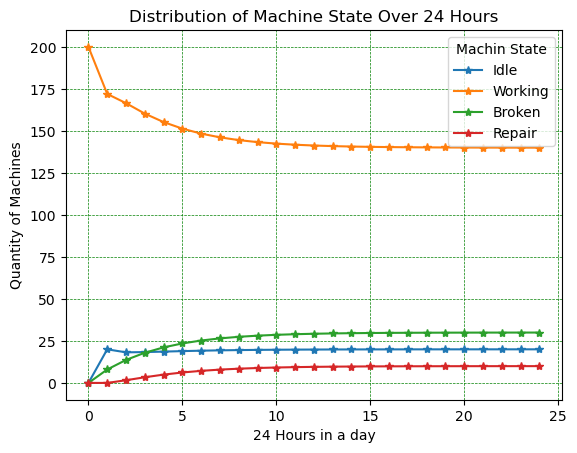

In [11]:
#implenting feature provided py python matplot lib library
plt.figure()  
#ploging final_output in the plot
plt.plot(hours, final_output[:, 0], label='Idle', marker='*')
plt.plot(hours, final_output[:, 1], label='Working', marker='*')
plt.plot(hours, final_output[:, 2], label='Broken', marker='*')
plt.plot(hours, final_output[:, 3], label='Repair', marker='*')

#it all sate of machine on small box
plt.legend(title='Machin State') 
#xlable() & ylabel() functions allows to add x-axis and y-axis
plt.xlabel("24 Hours in a day") 
plt.ylabel("Quantity of Machines")
plt.title("Distribution of Machine State Over 24 Hours")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show() #it allows to display out plot 

##### Code to calculate the egeince vector of Transition Matrix A & Steady state of machine

In [13]:
#using the helps of above matrix M
#Egience value V and egience vector P 
V, P = np.linalg.eig(A)             #numpy linear algebra to calculate the egience value and vector if any T Matrix 
print('The Egience vector of T matrix A : \n', P)

The Egience vector of T matrix A : 
 [[ 0.70224021 -0.13801311  0.0841534   0.33700315]
 [-0.71170273 -0.96609178 -0.83353499 -0.83629975]
 [ 0.01683788 -0.20701967  0.46783381  0.07303705]
 [-0.00737535 -0.06900656  0.28154778  0.42625955]]


In [14]:
# We have used here egience vector P of transition matrix A & 
# Egience value V and here 1 represent the long run steady state
steady_state = P[:, np.isclose(V, 1)].reshape(-1)            #numpy.isclose function use for bool array and reshape(-1) for reshaping data
steady_state = steady_state / steady_state.sum()  # 
print('Steady State vector at each state of machine :', steady_state) 

Steady State vector at each state of machine : [0.1  0.7  0.15 0.05]


#### Task-1-Part-3-A (Above A matrix modifications to create New T Matrix)

In [26]:
#let's create new modified matrix based on the above part 1 T Matrix 
#According to the task, when ideal state is switched off 
new_A = np.array([[1.0, 0.0, 0.0, 0.0],
                      [0.93, 0.86, 0.0, 0.1],
                      [0.02, 0.04, 0.8, 0.0],
                      [0.0, 0.0, 0.2, 0.4]])
print('Modified transitions New_A : \n', new_A)

Modified transitions New_A : 
 [[1.   0.   0.   0.  ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]]


In [27]:
#steady state vactor of 200 machine when machine was in zero satge 
#from part 2 each state machine steady state vector was [0.1  0.7  0.15 0.05]
#200 machine in zero state 
first_state = 200*steady_state 
print('On initial the state of machine was :', first_state) 

#after implmmenting new policy estimate the number of hours until there are fewer than 20 Working machines.
# Store the states over time
time_state = [first_state]
hours = 0

On initial the state of machine was : [ 20. 140.  30.  10.]


In [28]:
# Simulate until fewer than 20 machines are Working
# Index value 1 refers to the state of machine working
for _ in range(first_state[1] >= 20):
    first_state = new_A @ first_state
    time_state.append(first_state)
    hours +=1

#chaing list in to Array 
new_time_state = np.array(time_state)
print('the state of machine become less then 20 : \n', new_time_state)

the state of machine become less then 20 : 
 [[ 20. 140.  30.  10.]
 [ 20. 140.  30.  10.]]


C:\Users\acer\AppData\Local\Temp\ipykernel_12688\1479523654.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  for _ in range(first_state[1] >= 20):


In [29]:
print('Estimated hours >= 20 Working machines :', hours)

Estimated hours >= 20 Working machines : 1


#### Task-1-Part-3-B 

In [32]:
# Define the modified transition matrix excluding the Idle state row and column
N = new_A[1:, 1:]        # Remove the first row and column (corresponding to Idle)
print('New (3*3) matrix after elemenating frist row and first column : \n', N)

New (3*3) matrix after elemenating frist row and first column : 
 [[0.86 0.   0.1 ]
 [0.04 0.8  0.  ]
 [0.   0.2  0.4 ]]


In [33]:
# 3x3 identity matrix
I = np.eye(N.shape[0])
print('The Identity matix I : \n', I)

The Identity matix I : 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
# Calculate (I - N)^(-1) 
#numpy .linalg.inv() functions allows to calculate the inverse of matrix
expected_time_matrix = np.linalg.inv(I - N)
# Sum of each column gives the expected time to reach Idle from each other state
expected_times = expected_time_matrix.sum(axis=0)
print("Expected times to reach Idle from each state (Working, Broken, Repair):", expected_times)


Expected times to reach Idle from each state (Working, Broken, Repair): [9.5  8.25 3.25]
